# 📦 Imports and Configuration


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🎨 Configure visualizations


In [59]:
plt.style.use("seaborn-v0_8")
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("viridis")

# 📂 Load processed data


In [60]:
data_path = Path("../data/processed/cleaned_stocks.parquet")
df = pd.read_parquet(data_path)
print(f"Data loaded: {len(df)} rows")

Data loaded: 36175 rows


# 🔍 Filter to AAPL for demonstration


In [61]:
aapl = df[df['ticker'] == 'AAPL'].copy()


# 📈 1. Basic Descriptive Statistics


In [62]:
numeric_cols = aapl.select_dtypes(include=[np.number]).columns.tolist()


In [63]:
print("="*50)
print("AAPL Descriptive Statistics:")
print(aapl[numeric_cols].describe().round(2))

AAPL Descriptive Statistics:
        close    high     low    open        volume  sma_20  rsi_14    macd  \
count  337.00  337.00  337.00  337.00  3.370000e+02  337.00  337.00  337.00   
mean   223.10  225.19  220.77  222.93  5.753274e+07  222.06   56.10    1.16   
std     18.51   18.55   18.16   18.42  3.890634e+07   19.03   15.80    3.12   
min    168.50  170.53  168.32  168.78  2.323470e+07  168.50   19.13   -7.25   
25%    216.76  218.75  213.45  215.60  3.948070e+07  217.48   45.29   -0.83   
50%    226.01  227.50  223.84  226.02  4.722760e+07  225.91   55.79    1.31   
75%    234.48  235.70  231.81  234.21  6.041240e+07  231.68   67.24    3.54   
max    258.74  259.81  257.35  257.91  3.186799e+08  252.76   87.11    7.02   

       boll_high  boll_low  volume_ma_20  volume_spike  atr_14  daily_return  
count     337.00    337.00  3.370000e+02        337.00  337.00        336.00  
mean      226.97    218.60  5.775644e+07          1.02    4.48          0.00  
std        19.13     1

# 📊 Additional metrics (excluding datetime)


In [64]:
stats = pd.DataFrame({
    'Skewness': aapl[numeric_cols].skew(),
    'Kurtosis': aapl[numeric_cols].kurtosis(),
    'Annualized Volatility': aapl[numeric_cols].std() * np.sqrt(252)
})
print("\nExtended Statistics:")
print(stats.round(2))


Extended Statistics:
              Skewness  Kurtosis  Annualized Volatility
close            -0.86      0.67           2.937800e+02
high             -0.89      0.67           2.944100e+02
low              -0.83      0.55           2.882900e+02
open             -0.85      0.56           2.924800e+02
volume            4.26     22.10           6.176189e+08
sma_20           -0.96      0.46           3.021100e+02
rsi_14           -0.09     -0.75           2.508300e+02
macd             -0.49     -0.05           4.945000e+01
boll_high        -0.95      0.73           3.036600e+02
boll_low         -0.85      0.64           3.016000e+02
volume_ma_20      1.26      1.05           2.733632e+08
volume_spike      3.20     16.25           8.520000e+00
atr_14           -0.77      2.05           2.295000e+01
daily_return      0.19      5.19           2.100000e-01


# 📊 2. Price Distribution Analysis


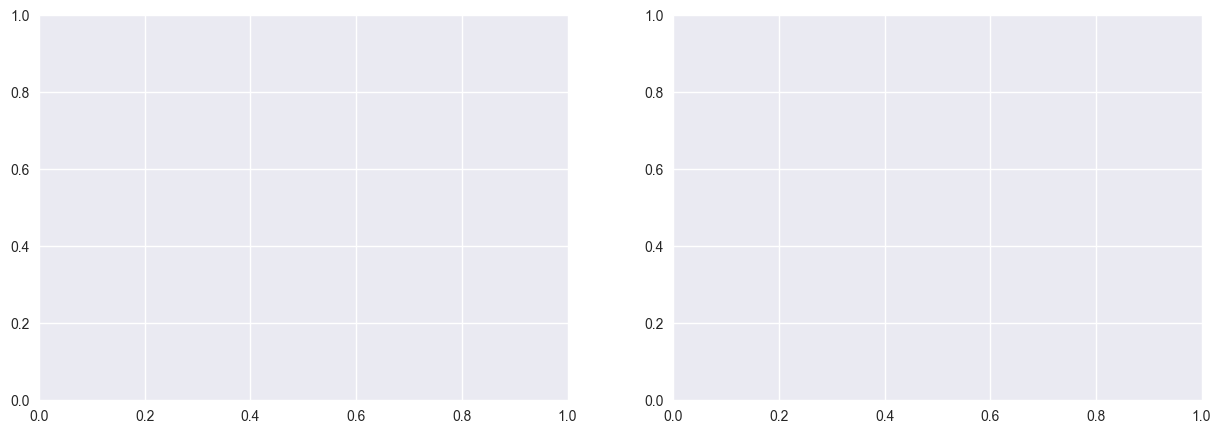

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# 📉 Histogram with KDE


In [66]:
sns.histplot(aapl['close'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('AAPL Closing Price Distribution')
axes[0].axvline(aapl['close'].mean(), color='r', linestyle='--', label=f"Mean: ${aapl['close'].mean():.2f}")

# 📦 Boxplot


In [67]:
sns.boxplot(x=aapl['close'], ax=axes[1])
axes[1].set_title('AAPL Price Spread')
plt.tight_layout()
plt.savefig('../notebooks/visualizationsf_for_sda/price_distribution.png', dpi=300)
plt.show()

<Figure size 1200x600 with 0 Axes>

# 🕰️ 3. Time Series Visualizations


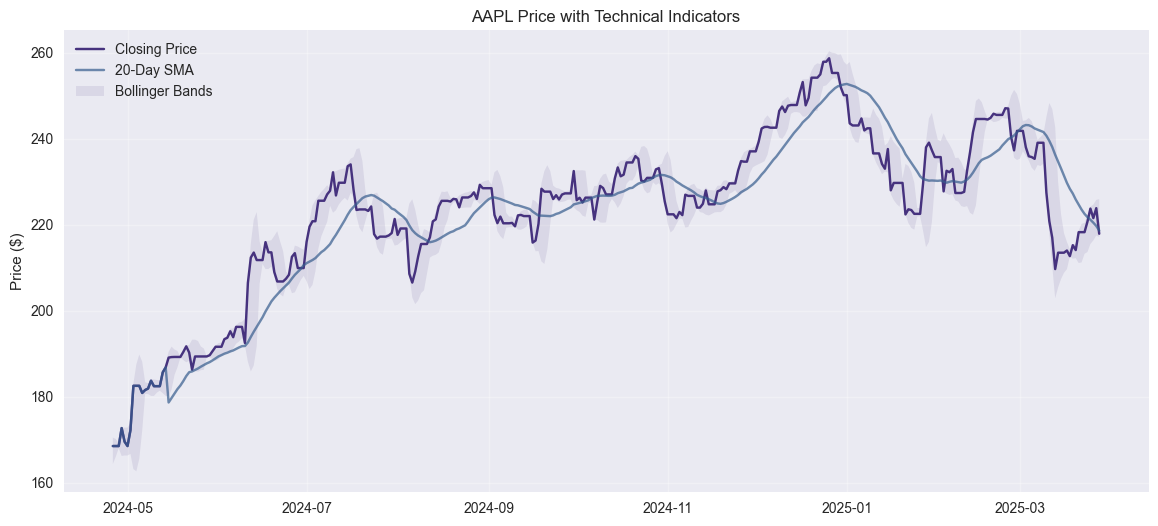

In [68]:
plt.figure(figsize=(14, 6))
plt.plot(aapl['date'], aapl['close'], label='Closing Price')
plt.plot(aapl['date'], aapl['sma_20'], label='20-Day SMA', alpha=0.7)
plt.fill_between(aapl['date'], aapl['boll_low'], aapl['boll_high'], alpha=0.1, label='Bollinger Bands')
plt.title('AAPL Price with Technical Indicators')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../notebooks/visualizationsf_for_sda/price_trends.png', dpi=300)
plt.show()

# 📊 4. Returns Analysis


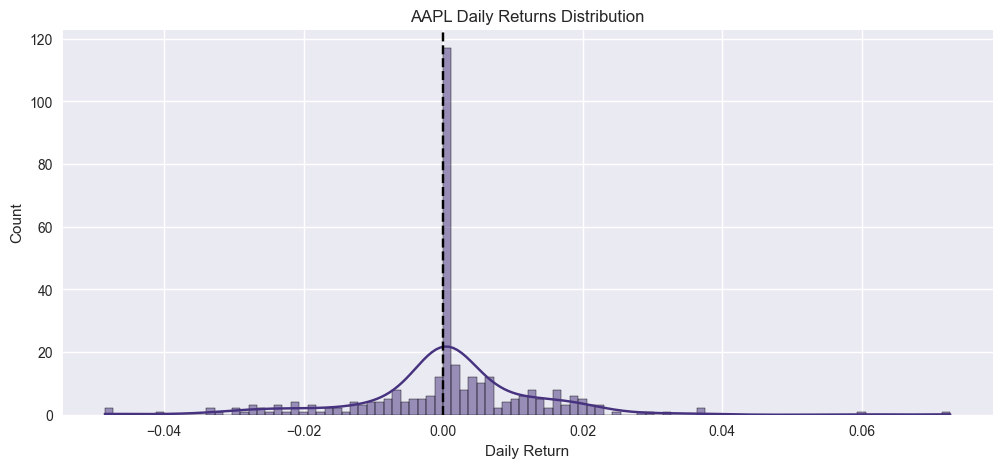

In [69]:
plt.figure(figsize=(12, 5))
sns.histplot(aapl['daily_return'].dropna(), bins=100, kde=True)
plt.title('AAPL Daily Returns Distribution')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Daily Return')
plt.savefig('../notebooks/visualizationsf_for_sda/returns_dist.png', dpi=300)
plt.show()

# 🔎 QQ Plot for normality check


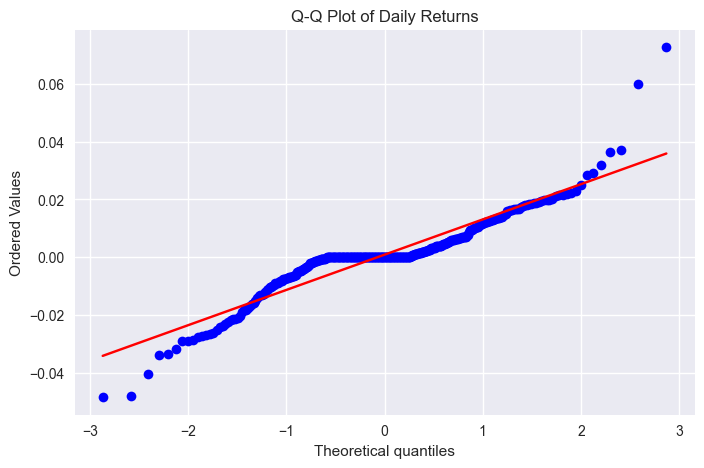

In [70]:
from scipy import stats
plt.figure(figsize=(8, 5))
stats.probplot(aapl['daily_return'].dropna(), plot=plt)
plt.title('Q-Q Plot of Daily Returns')
plt.savefig('../notebooks/visualizationsf_for_sda/qq_plot.png', dpi=300)
plt.show()

# 🔁 5. Volume Analysis


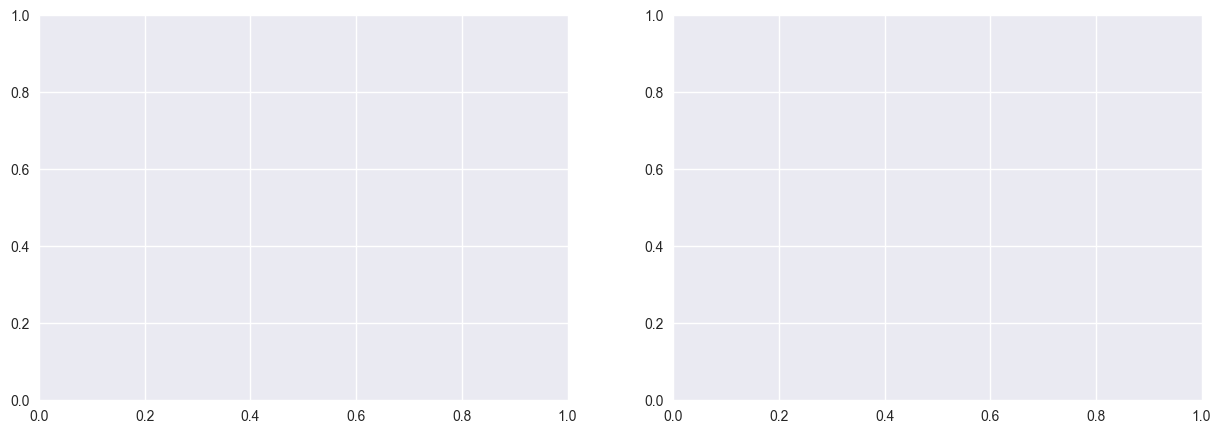

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# 📊 Volume Trends


In [72]:
axes[0].plot(aapl['date'], aapl['volume']/1e6, label='Daily Volume')
axes[0].plot(aapl['date'], aapl['volume_ma_20']/1e6, label='20-Day MA')
axes[0].set_title('Trading Volume (Millions)')
axes[0].set_ylabel('Volume')
axes[0].legend()

# 🧮 Volume vs. Returns


In [73]:
sns.scatterplot(x=aapl['volume']/1e6, y=aapl['daily_return'], ax=axes[1], alpha=0.5)
axes[1].set_title('Volume vs. Daily Returns')
axes[1].set_xlabel('Volume (Millions)')
plt.tight_layout()
plt.savefig('../notebooks/visualizationsf_for_sda/volume_analysis.png', dpi=300)
plt.show()

<Figure size 1200x600 with 0 Axes>

# 🧩 6. Correlation Analysis


In [74]:
corr_cols = ['close', 'sma_20', 'rsi_14', 'macd', 'volume', 'daily_return']
corr_matrix = aapl[corr_cols].corr()

# 🔗 Technical Indicators Correlation


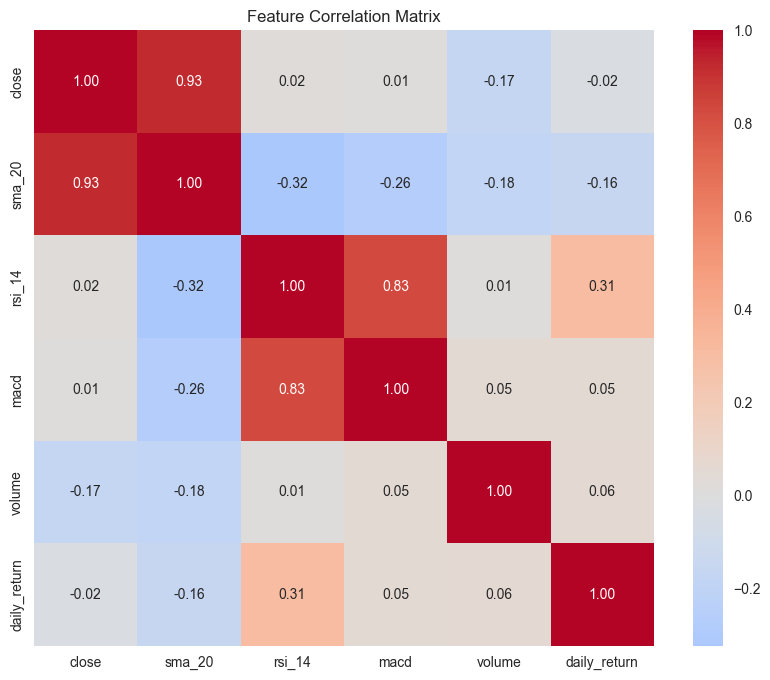

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig('../notebooks/visualizationsf_for_sda/correlation_matrix.png', dpi=300)
plt.show()

# 💾 Save statistical summary to CSV


In [76]:
stats_summary = pd.concat([
    aapl[numeric_cols].describe().round(2),
    pd.DataFrame({
        'skewness': aapl[numeric_cols].skew(),
        'kurtosis': aapl[numeric_cols].kurtosis()
    })
])
stats_summary.to_csv('../reports/statistical_summary.csv')